In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
# embed figures into the notebook
%matplotlib inline

In [3]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = np.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [4]:
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet

In [5]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [6]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

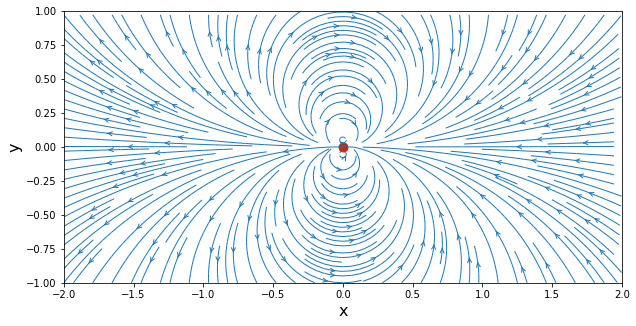

In [7]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

In [8]:
u_inf = 1.0        # freestream speed
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

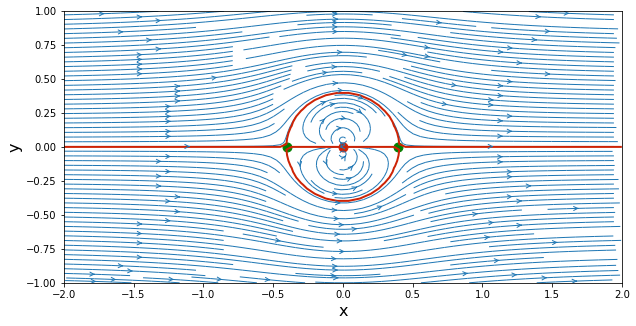

In [15]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');
plt.savefig('flowfield.png', dpi=90)
plt.show()

In [14]:
plt.savefig('flowfield.png', dpi=90)
plt.show()

<Figure size 432x288 with 0 Axes>